# Capstone Two: Data Wrangling

In [32]:
#Importing all the required packages.

from pathlib import Path

import requests
import numpy as np
import pandas as pd
import os
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Downloading the file using file caching

file_name = cache_file(
    "COVID-19 Cases-3",
    "https://prsindia.org/covid-19/cases/download",
)
    
df = pd.read_csv(file_name)

In [3]:
df.head()

S. No.        Date Region  Confirmed Cases  Active Cases  Cured/Discharged  \
0       1  12/03/2020  India               74            71               3.0   
1       2  13/03/2020  India               75            71               3.0   
2       3  14/03/2020  India               84            72              10.0   
3       4  15/03/2020  India              107            95              10.0   
4       5  16/03/2020  India              114            99              13.0   

   Death  
0    0.0  
1    1.0  
2    2.0  
3    2.0  
4    2.0

In [4]:
df.columns

Index(['S. No.', 'Date', 'Region', 'Confirmed Cases', 'Active Cases',
       'Cured/Discharged', 'Death'],
      dtype='object')

In [5]:
#checking the data for today's date

df[df['Date']=='18/08/2020']

S. No.        Date                                    Region  \
159      160  18/08/2020                                     India   
305      306  18/08/2020               Andaman and Nicobar Islands   
466      467  18/08/2020                            Andhra Pradesh   
605      606  18/08/2020                         Arunachal Pradesh   
745      746  18/08/2020                                     Assam   
896      897  18/08/2020                                     Bihar   
1050    1051  18/08/2020                                Chandigarh   
1203    1204  18/08/2020                              Chhattisgarh   
1306    1307  18/08/2020  Dadra and Nagar Haveli and Daman and Diu   
1467    1468  18/08/2020                                     Delhi   
1614    1615  18/08/2020                                       Goa   
1767    1768  18/08/2020                                   Gujarat   
1928    1929  18/08/2020                                   Haryana   
2080    2081  18/08/2020                          Himachal Pradesh   
2241    2242  18/08/2020                         Jammu and Kashmir   
2381    2382  18/08/2020                                 Jharkhand   
2542    2543  18/08/2020                                 Karnataka   
2703    2704  18/08/2020                                    Kerala   
2864    2865  18/08/2020                                    Ladakh   
2885    2886  18/08/2020                               Lakshadweep   
3037    3038  18/08/2020                            Madhya Pradesh   
3198    3199  18/08/2020                               Maharashtra   
3346    3347  18/08/2020                                   Manipur   
3473    3474  18/08/2020                                 Meghalaya   
3620    3621  18/08/2020                                   Mizoram   
3714    3715  18/08/2020                                  Nagaland   
3871    3872  18/08/2020                                    Odisha   
4025    4026  18/08/2020                                Puducherry   
4186    4187  18/08/2020                                    Punjab   
4347    4348  18/08/2020                                 Rajasthan   
4435    4436  18/08/2020                                    Sikkim   
4684    4685  18/08/2020                                Tamil Nadu   
4845    4846  18/08/2020                                 Telangana   
4980    4981  18/08/2020                                   Tripura   
5141    5142  18/08/2020                             Uttar Pradesh   
5298    5299  18/08/2020                               Uttarakhand   
5452    5453  18/08/2020                               West Bengal   
5612    5613  18/08/2020                                     World   

      Confirmed Cases  Active Cases  Cured/Discharged     Death  
159           2702742        673166         1977779.0   51797.0  
305              2445          1091            1325.0      29.0  
466            296609         84777          209100.0    2732.0  
605              2741           843            1893.0       5.0  
745             79667         22736           56734.0     197.0  
896            106307         29387           76452.0     468.0  
1050             2216          1003            1183.0      30.0  
1203            16025          5277           10598.0     150.0  
1306             1908           447            1459.0       2.0  
1467           153367         10852          138301.0    4214.0  
1614            11994          3825            8058.0     111.0  
1767            79710         14315           62595.0    2800.0  
1928            48040          6880           40610.0     550.0  
2080             4174          1321            2834.0      19.0  
2241            28892          7048           21296.0     548.0  
2381            23752          8451           15051.0     250.0  
2542           233283         80659          148562.0    4062.0  
2703            46140         15946           30025.0     169.0  
2864             1966

In [6]:
#Loading population data into a dataframe called df1

df1=pd.read_csv(r'population_india_census2011.csv')

In [7]:
#Columns that are present in df1
df1.columns

Index(['Sno', 'State / Union Territory', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [8]:
#Merging two dataframes df & df1 to dfm. As we want population column we are merging these two dataframes.

dfm=pd.merge(df, df1, how='inner', on=None, left_on='Region', right_on='State / Union Territory',
         left_index=False, right_index=False, sort=True,
         suffixes=('x', 'y'), copy=True, indicator=False,
         validate=None)

In [9]:
#checking the merged data for single day
dfm[dfm['Date']=='18/08/2020']

S. No.        Date                                    Region  \
144      306  18/08/2020               Andaman and Nicobar Islands   
305      467  18/08/2020                            Andhra Pradesh   
444      606  18/08/2020                         Arunachal Pradesh   
584      746  18/08/2020                                     Assam   
735      897  18/08/2020                                     Bihar   
889     1051  18/08/2020                                Chandigarh   
1042    1204  18/08/2020                              Chhattisgarh   
1145    1307  18/08/2020  Dadra and Nagar Haveli and Daman and Diu   
1306    1468  18/08/2020                                     Delhi   
1453    1615  18/08/2020                                       Goa   
1606    1768  18/08/2020                                   Gujarat   
1767    1929  18/08/2020                                   Haryana   
1919    2081  18/08/2020                          Himachal Pradesh   
2080    2242  18/08/2020                         Jammu and Kashmir   
2220    2382  18/08/2020                                 Jharkhand   
2381    2543  18/08/2020                                 Karnataka   
2542    2704  18/08/2020                                    Kerala   
2703    2865  18/08/2020                                    Ladakh   
2724    2886  18/08/2020                               Lakshadweep   
2876    3038  18/08/2020                            Madhya Pradesh   
3037    3199  18/08/2020                               Maharashtra   
3185    3347  18/08/2020                                   Manipur   
3312    3474  18/08/2020                                 Meghalaya   
3459    3621  18/08/2020                                   Mizoram   
3553    3715  18/08/2020                                  Nagaland   
3710    3872  18/08/2020                                    Odisha   
3864    4026  18/08/2020                                Puducherry   
4025    4187  18/08/2020                                    Punjab   
4186    4348  18/08/2020                                 Rajasthan   
4274    4436  18/08/2020                                    Sikkim   
4435    4685  18/08/2020                                Tamil Nadu   
4570    4981  18/08/2020                                   Tripura   
4731    5142  18/08/2020                             Uttar Pradesh   
4888    5299  18/08/2020                               Uttarakhand   
5042    5453  18/08/2020                               West Bengal   

      Confirmed Cases  Active Cases  Cured/Discharged    Death  Sno  \
144              2445          1091            1325.0     29.0   34   
305            296609         84777          209100.0   2732.0   10   
444              2741           843            1893.0      5.0   26   
584             79667         22736           56734.0    197.0   15   
735            106307         29387           76452.0    468.0    3   
889              2216          1003            1183.0     30.0   32   
1042            16025          5277           10598.0    150.0   17   
1145             1908           447            1459.0      2.0   33   
1306           153367         10852          138301.0   4214.0   29   
1453            11994          3825            8058.0    111.0   25   
1606            79710         14315           62595.0   2800.0    9   
1767            48040          6880           40610.0    550.0   18   
1919             4174          1321            2834.0     19.0   20   
2080            28892          7048           21296.0    548.0   30   
2220            23752          8451           15051.0    250.0   14   
2381           233283         80659          148562.0   4062.0    8   
2542            46140         15946           30025.0    169.0   13   
2703             1966           584            1368.0     14.0   35   
2724                0             0               0.0      0.0   36   
2876            46385         10232           35025.0   1128.0   

In [10]:
#Here we have all the columns from both df & df1 dataframes. As our dataset becomes clumsy we are dropping the columns which are not useful.

dfm=dfm.drop(['Sno','S. No.','State / Union Territory','Area','Density','Gender Ratio'],axis=1)

In [11]:
#Verifying whether those columns deleted or not.

dfm[dfm['Date']=='18/08/2020']

Date                                    Region  Confirmed Cases  \
144   18/08/2020               Andaman and Nicobar Islands             2445   
305   18/08/2020                            Andhra Pradesh           296609   
444   18/08/2020                         Arunachal Pradesh             2741   
584   18/08/2020                                     Assam            79667   
735   18/08/2020                                     Bihar           106307   
889   18/08/2020                                Chandigarh             2216   
1042  18/08/2020                              Chhattisgarh            16025   
1145  18/08/2020  Dadra and Nagar Haveli and Daman and Diu             1908   
1306  18/08/2020                                     Delhi           153367   
1453  18/08/2020                                       Goa            11994   
1606  18/08/2020                                   Gujarat            79710   
1767  18/08/2020                                   Haryana            48040   
1919  18/08/2020                          Himachal Pradesh             4174   
2080  18/08/2020                         Jammu and Kashmir            28892   
2220  18/08/2020                                 Jharkhand            23752   
2381  18/08/2020                                 Karnataka           233283   
2542  18/08/2020                                    Kerala            46140   
2703  18/08/2020                                    Ladakh             1966   
2724  18/08/2020                               Lakshadweep                0   
2876  18/08/2020                            Madhya Pradesh            46385   
3037  18/08/2020                               Maharashtra           604358   
3185  18/08/2020                                   Manipur             4687   
3312  18/08/2020                                 Meghalaya             1418   
3459  18/08/2020                                   Mizoram              789   
3553  18/08/2020                                  Nagaland             3455   
3710  18/08/2020                                    Odisha            62294   
3864  18/08/2020                                Puducherry             8029   
4025  18/08/2020                                    Punjab            32696   
4186  18/08/2020                                 Rajasthan            62630   
4274  18/08/2020                                    Sikkim             1187   
4435  18/08/2020                                Tamil Nadu           343945   
4570  18/08/2020                                   Tripura             7409   
4731  18/08/2020                             Uttar Pradesh           158216   
4888  18/08/2020                               Uttarakhand            12493   
5042  18/08/2020                               West Bengal           119578   

      Active Cases  Cured/Discharged    Death  Population  Rural population  \
144           1091            1325.0     29.0      380581            237093   
305          84777          209100.0   2732.0    49577103          34966693   
444            843            1893.0      5.0     1383727           1066358   
584          22736           56734.0    197.0    31205576          26807034   
735          29387           76452.0    468.0   104099452          92341436   
889           1003            1183.0     30.0     1055450             28991   
1042          5277           10598.0    150.0    25545198          19607961   
1145           447            1459.0      2.0      585764            243510   
1306         10852          138301.0   4214.0    16787941            419042   
1453          3825            8058.0    111.0     1458545            551731   
1606         14315           62595.0   2800.0    60439692          34694609   
1767          6880           40610.0    550.0    25351462          16509359   
1919          1321            2834.0     19.0     6864602           6176050   
2080          7048           21296.0    548.0    12267032    

In [12]:
dfm.columns

Index(['Date', 'Region', 'Confirmed Cases', 'Active Cases', 'Cured/Discharged',
       'Death', 'Population', 'Rural population', 'Urban population'],
      dtype='object')

In [13]:
#Renaming all the column names to lower case as it will be easy to manipulate the data using column names further.

dfm.columns = ['date','region','confirmed cases','active cases','discharged','death','population','rural population','urban population']

In [14]:
#Verifying whether the column names were changed to lower case or not.

dfm.columns

Index(['date', 'region', 'confirmed cases', 'active cases', 'discharged',
       'death', 'population', 'rural population', 'urban population'],
      dtype='object')

In [15]:
#checking the top 5 rows of the dataframe.

dfm.head()

date                       region  confirmed cases  active cases  \
0  27/03/2020  Andaman and Nicobar Islands                1             1   
1  28/03/2020  Andaman and Nicobar Islands                6             6   
2  29/03/2020  Andaman and Nicobar Islands                9             9   
3  30/03/2020  Andaman and Nicobar Islands                9             9   
4  31/03/2020  Andaman and Nicobar Islands               10            10   

   discharged  death  population  rural population  urban population  
0         0.0    0.0      380581            237093            143488  
1         0.0    0.0      380581            237093            143488  
2         0.0    0.0      380581            237093            143488  
3         0.0    0.0      380581            237093            143488  
4         0.0    0.0      380581            237093            143488

In [16]:
#Checking the datatypes of all the columns in our dfm dataframe.

dfm.dtypes

date                 object
region               object
confirmed cases       int64
active cases          int64
discharged          float64
death               float64
population            int64
rural population      int64
urban population      int64
dtype: object

In [17]:
#As we can see 'discharged' & 'death' columns are in float. We can change it to int as the values of people getting discharged and deaths won't be decimals.

dfm['discharged']=dfm['discharged'].astype('int64')
dfm['death']=dfm['death'].astype('int64')

In [18]:
# Verify the datatypes of the columns.

dfm.dtypes

date                object
region              object
confirmed cases      int64
active cases         int64
discharged           int64
death                int64
population           int64
rural population     int64
urban population     int64
dtype: object

In [19]:
#Now we can see the data type of discharged and death columns is int.

dfm[dfm['date']=='18/08/2020']

date                                    region  confirmed cases  \
144   18/08/2020               Andaman and Nicobar Islands             2445   
305   18/08/2020                            Andhra Pradesh           296609   
444   18/08/2020                         Arunachal Pradesh             2741   
584   18/08/2020                                     Assam            79667   
735   18/08/2020                                     Bihar           106307   
889   18/08/2020                                Chandigarh             2216   
1042  18/08/2020                              Chhattisgarh            16025   
1145  18/08/2020  Dadra and Nagar Haveli and Daman and Diu             1908   
1306  18/08/2020                                     Delhi           153367   
1453  18/08/2020                                       Goa            11994   
1606  18/08/2020                                   Gujarat            79710   
1767  18/08/2020                                   Haryana            48040   
1919  18/08/2020                          Himachal Pradesh             4174   
2080  18/08/2020                         Jammu and Kashmir            28892   
2220  18/08/2020                                 Jharkhand            23752   
2381  18/08/2020                                 Karnataka           233283   
2542  18/08/2020                                    Kerala            46140   
2703  18/08/2020                                    Ladakh             1966   
2724  18/08/2020                               Lakshadweep                0   
2876  18/08/2020                            Madhya Pradesh            46385   
3037  18/08/2020                               Maharashtra           604358   
3185  18/08/2020                                   Manipur             4687   
3312  18/08/2020                                 Meghalaya             1418   
3459  18/08/2020                                   Mizoram              789   
3553  18/08/2020                                  Nagaland             3455   
3710  18/08/2020                                    Odisha            62294   
3864  18/08/2020                                Puducherry             8029   
4025  18/08/2020                                    Punjab            32696   
4186  18/08/2020                                 Rajasthan            62630   
4274  18/08/2020                                    Sikkim             1187   
4435  18/08/2020                                Tamil Nadu           343945   
4570  18/08/2020                                   Tripura             7409   
4731  18/08/2020                             Uttar Pradesh           158216   
4888  18/08/2020                               Uttarakhand            12493   
5042  18/08/2020                               West Bengal           119578   

      active cases  discharged  death  population  rural population  \
144           1091        1325     29      380581            237093   
305          84777      209100   2732    49577103          34966693   
444            843        1893      5     1383727           1066358   
584          22736       56734    197    31205576          26807034   
735          29387       76452    468   104099452          92341436   
889           1003        1183     30     1055450             28991   
1042          5277       10598    150    25545198          19607961   
1145           447        1459      2      585764            243510   
1306         10852      138301   4214    16787941            419042   
1453          3825        8058    111     1458545            551731   
1606         14315       62595   2800    60439692          34694609   
1767          6880       40610    550    25351462          16509359   
1919          1321        2834     19     6864602           6176050   
2080          7048       21296    548    12267032           9064220   
2220          8451       15051    250    32988134          25055073   
2381         80659      148562 

In [20]:
#Checking for Null values in the dataframe

dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5044 entries, 0 to 5043
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              5044 non-null   object
 1   region            5044 non-null   object
 2   confirmed cases   5044 non-null   int64 
 3   active cases      5044 non-null   int64 
 4   discharged        5044 non-null   int64 
 5   death             5044 non-null   int64 
 6   population        5044 non-null   int64 
 7   rural population  5044 non-null   int64 
 8   urban population  5044 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 394.1+ KB


In [21]:
#Checking for unique values
dfm.nunique()

date                 161
region                35
confirmed cases     3001
active cases        2569
discharged          2574
death               1025
population            35
rural population      35
urban population      35
dtype: int64

In [22]:
#Using profiling for checking the duplicate rows, missing values in our dataframe.
report = dfm.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

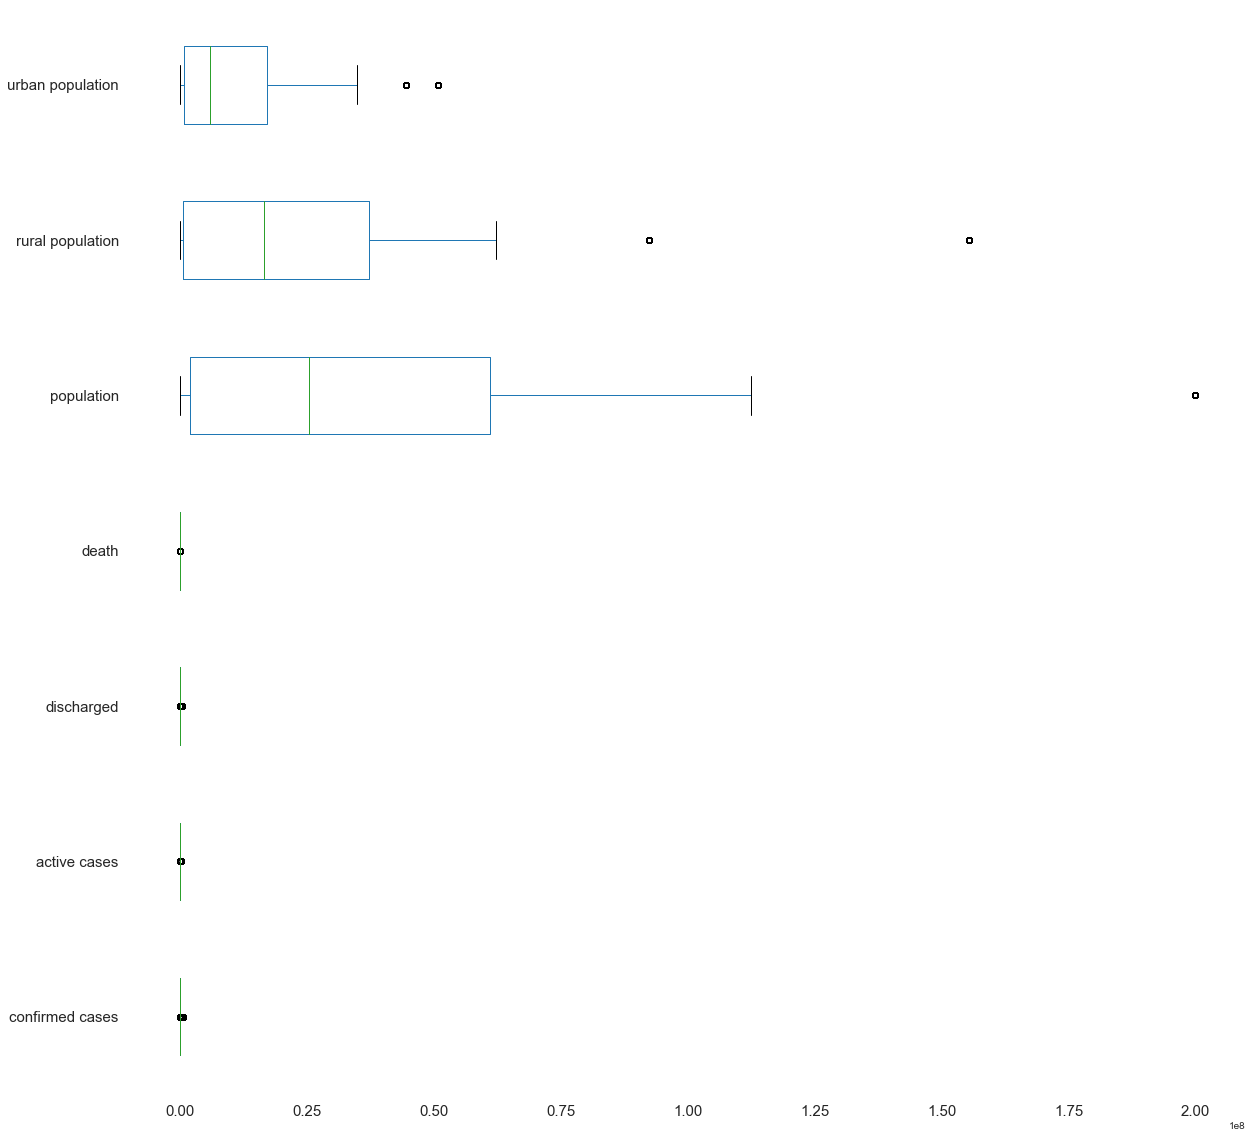

In [23]:
#Checking the boxplot for all the columns in the dataframe

boxplot = dfm.boxplot(grid=False, vert=False,fontsize=15, figsize=(20,20))

In [24]:
#checking the shape of the dataframe dfm
dfm.shape

(5044, 9)

In [25]:
#For removing the outliers in the data we are calculating Interquartile range.

In [26]:
# Using quantile method we got the first and third quartiles and stored them in Q1 & Q3 variables.

Q1 = dfm.quantile(0.25)

In [27]:
Q3 = dfm.quantile(0.99)

In [28]:
# Calculating the Interquartile range and storing it in variable called IQR

IQR = Q3 - Q1

In [29]:
#Here we are adding all those observations which are not outliers to the new dataframe dfnew

dfnew = dfm[~((dfm < (Q1 - 1.5 * IQR)) |(dfm> (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
#Checking the shape of new dataframe dfnew

dfnew.shape

(5038, 9)

# Exploratory Data Analysis - EDA

In [ ]:
#Finding the correlation between the columns in our new dataframe 'dfnew'.

In [31]:
dfnew.corr()

confirmed cases  active cases  discharged     death  \
confirmed cases          1.000000      0.941367    0.984917  0.913363   
active cases             0.941367      1.000000    0.869097  0.889125   
discharged               0.984917      0.869097    1.000000  0.877609   
death                    0.913363      0.889125    0.877609  1.000000   
population               0.297240      0.331163    0.266669  0.282244   
rural population         0.217171      0.248402    0.192306  0.190753   
urban population         0.443374      0.478070    0.404012  0.459151   

                  population  rural population  urban population  
confirmed cases     0.297240          0.217171          0.443374  
active cases        0.331163          0.248402          0.478070  
discharged          0.266669          0.192306          0.404012  
death               0.282244          0.190753          0.459151  
population          1.000000          0.980562          0.875047  
rural population    0.980562          1.000000          0.763067  
urban population    0.875047          0.763067          1.000000

Here we can see that 3 columns 'active cases', 'discharged', 'death' are highly correlated. Let us see the correlation using pair plot.

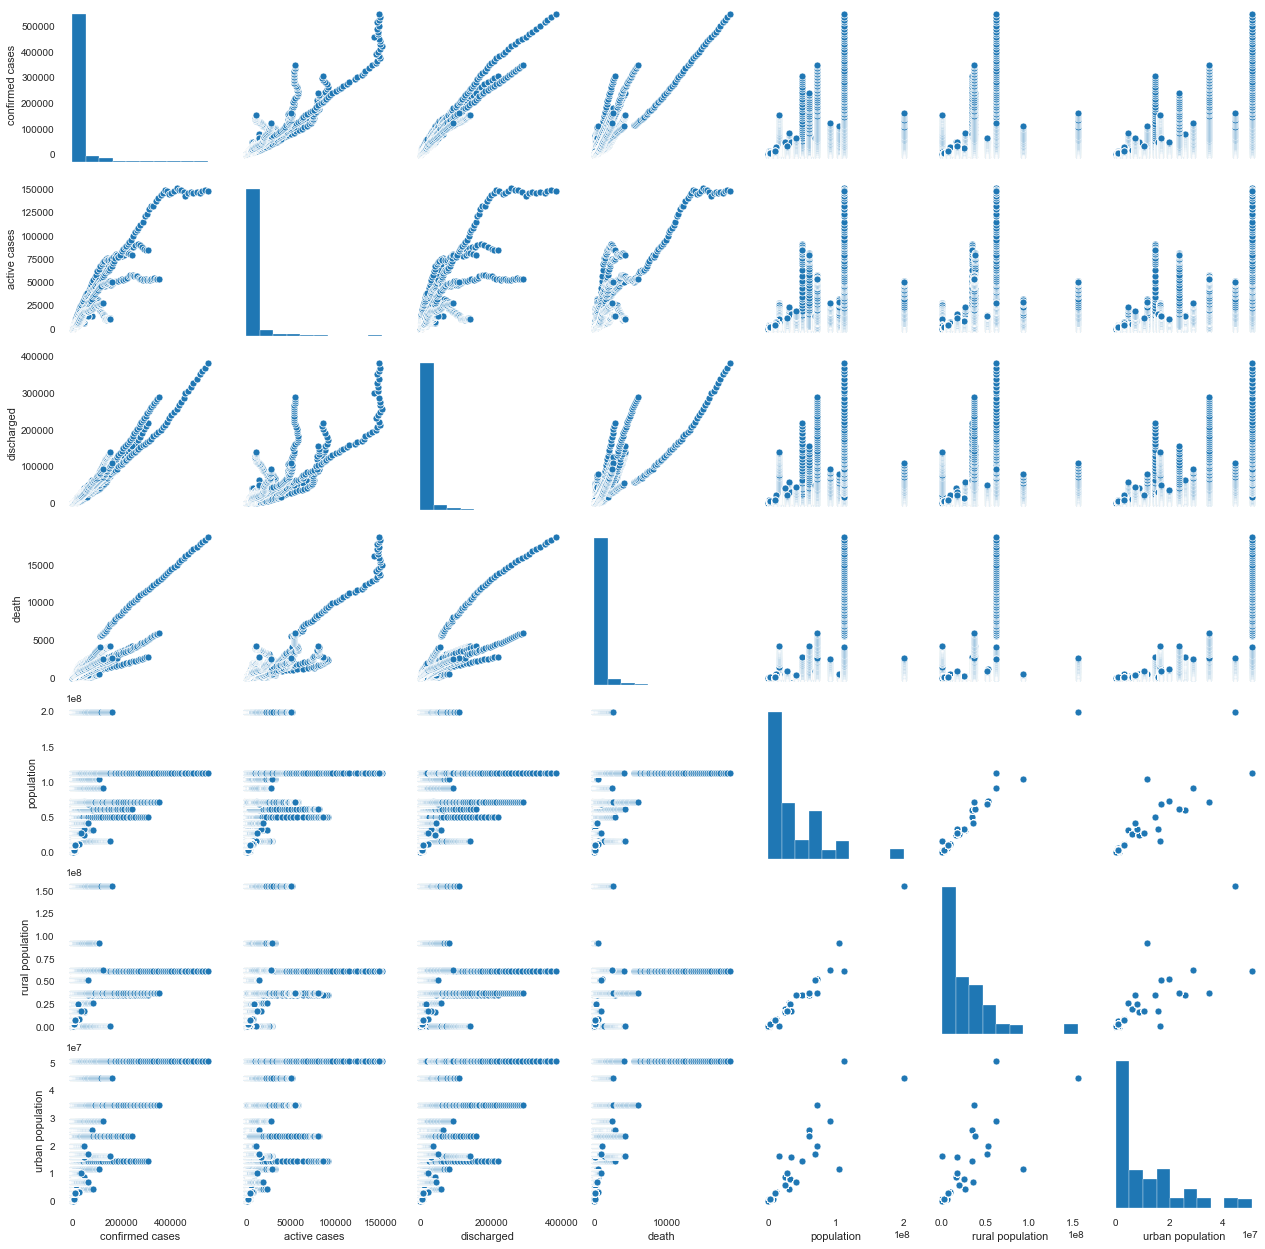

In [33]:
sns.pairplot(dfnew)

In [34]:
# For getting the best way of correlation let us check the heat map.

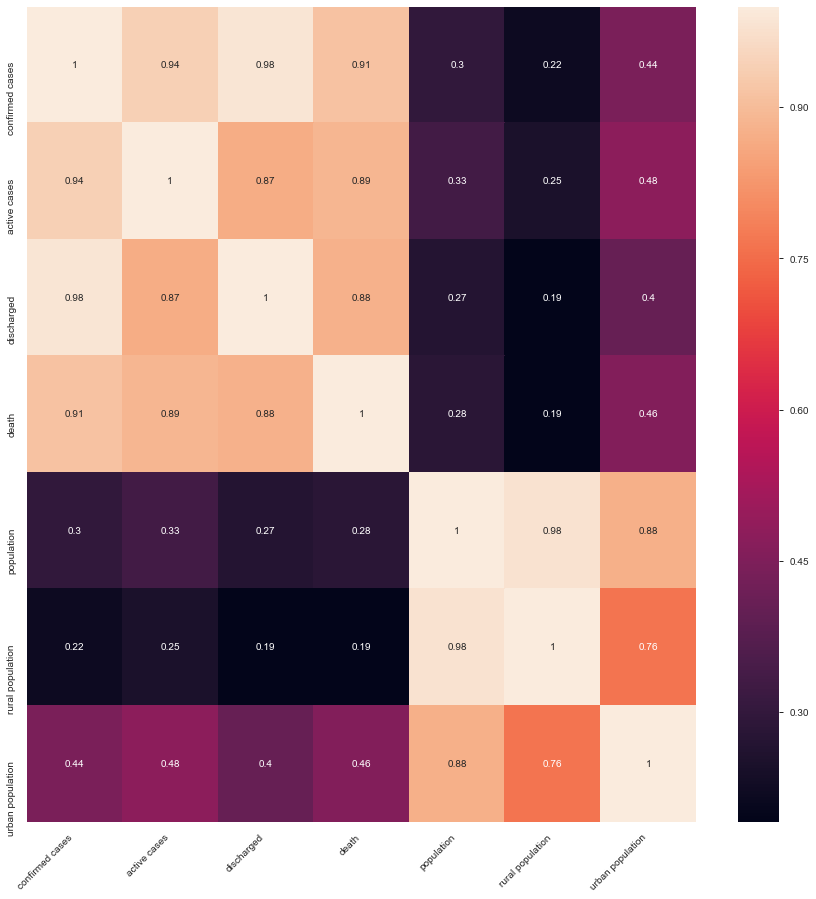

In [35]:
#Heat map of the data

plt.figure(figsize=(15,15))
hm = sns.heatmap(dfnew.corr(), annot=True)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right');

Here we have clearly noticed that compared to confirmed cases, active cases, discharged and death are highly correlated.

In [36]:
# Let us check the scatterplot for the highly correlated columns.

<AxesSubplot:xlabel='confirmed cases', ylabel='active cases'>

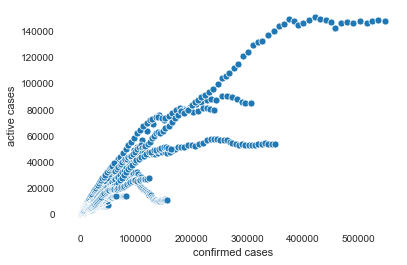

In [37]:
# Calling the scatterplot method with : x = 'confirmed cases', y = 'active cases'

sns.scatterplot(x="confirmed cases", y="active cases", data=dfnew)

<AxesSubplot:xlabel='confirmed cases', ylabel='active cases'>

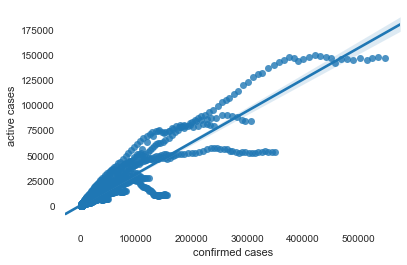

In [38]:
# Calling the regplot method on sns object with parameters: x = 'confirmed cases', y = 'active cases'

sns.regplot(x="confirmed cases", y="active cases", data=dfnew)

We can see the positive correlation. The line almost matches the data.

<AxesSubplot:xlabel='confirmed cases', ylabel='discharged'>

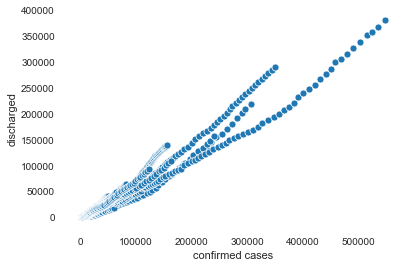

In [40]:
# Calling the scatterplot method with : x = 'confirmed cases', y = 'discharged'

sns.scatterplot(x="confirmed cases", y="discharged", data=dfnew)

<AxesSubplot:xlabel='confirmed cases', ylabel='discharged'>

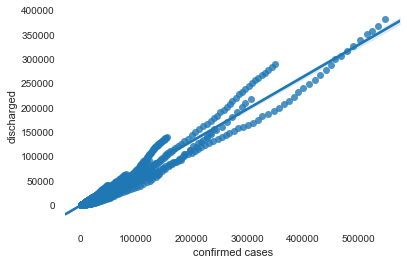

In [41]:
# Calling the regplot method on sns object with parameters: x = 'confirmed cases', y = 'discharged'

sns.regplot(x="confirmed cases", y="discharged", data=dfnew)

Here we can clearly see the positive correlation and  very less number of points deviate from the line.

<AxesSubplot:xlabel='confirmed cases', ylabel='death'>

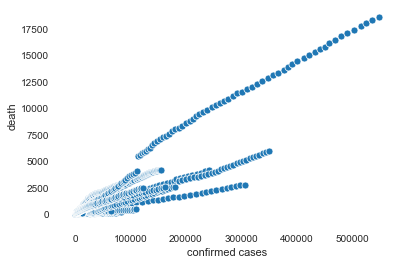

In [42]:
# Calling the scatterplot method with : x = 'confirmed cases', y = 'death'

sns.scatterplot(x="confirmed cases", y="death", data=dfnew)

<AxesSubplot:xlabel='confirmed cases', ylabel='death'>

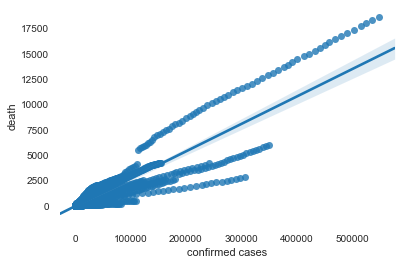

In [43]:
# Calling the regplot method on sns object with parameters: x = 'confirmed cases', y = 'death'

sns.regplot(x="confirmed cases", y="death", data=dfnew)

Here majority of our points deviate from the line rather than clustering close.